In [10]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
mpki_values = {}

In [12]:
# Parsing log files for baseline and different prefetch degrees
base_dir = "../output/"
log_files = {
    "baseline": "baseline/no-no-1core",  # Log with no prefetcher
    "ip-stride": "task3/ip_stride-no-1core",
    "complex-stride": "task3/complex_stride-no-1core",
    "next-line": "task3/next_line-no-1core",
    "optimized": "task3/optimized-no-1core"

}

In [13]:
# Function to parse a Champsim log file
def parse_champsim_log(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

        # Find IPC
        mpki_match = re.search(r'L1D LOAD\s+.*\s+MPKI:\s+([\d\.]+)', log_data)
        mpki_load = float(mpki_match.group(1)) if mpki_match else 0
        mpki_match = re.search(r'L1D TOTAL\s+.*\s+MPKI:\s+([\d\.]+)', log_data)
        mpki_total = float(mpki_match.group(1)) if mpki_match else 0

    return [mpki_load,mpki_total]

In [14]:
# Iterate through each log file and store IPC
for trace in range(3):
    t = {}
    for prefetcher, log_file in log_files.items():
        mpki = parse_champsim_log(base_dir + log_file + f"-trace{trace+1}.log")
        t[prefetcher] = mpki
    mpki_values[trace+1] = t
mpki_values

{1: {'baseline': [45.4355, 48.21],
  'ip-stride': [45.6271, 49.2384],
  'complex-stride': [45.9344, 52.2531],
  'next-line': [49.1029, 216.727],
  'optimized': [49.0278, 215.469]},
 2: {'baseline': [69.9647, 69.9934],
  'ip-stride': [16.067, 70.7358],
  'complex-stride': [10.1996, 72.2836],
  'next-line': [11.1521, 73.259],
  'optimized': [11.1701, 73.2536]},
 3: {'baseline': [154.963, 155.279],
  'ip-stride': [121.588, 155.447],
  'complex-stride': [116.931, 166.655],
  'next-line': [121.98, 519.913],
  'optimized': [116.956, 167.325]}}

In [15]:
# Plotting graphs
def plot_for_trace(trace):
    # Bar plot for Speedup (IPC improvement)
    # Bar plot for MPKI
    plt.figure(figsize=(6, 4))
    prefetchers = list(mpki_values[trace].keys())
    values = np.array(list(mpki_values[trace].values()))

    # Number of bars per group (Load MPKI and Total MPKI)
    n_bars = values.shape[1]

    # Set the positions and width for the bars
    bar_width = 0.35
    index = np.arange(len(prefetchers))

    # Plotting the bars
    fig, ax = plt.subplots()

    bar1 = ax.bar(index, values[:, 0], bar_width, label='Load MPKI', color='dodgerblue')
    bar2 = ax.bar(index + bar_width, values[:, 1], bar_width, label='Total MPKI', color='darkorange')


    ax.set_xlabel('Prefetcher')
    ax.set_ylabel('MPKI')
    ax.set_title('Load and Total MPKI for Different Prefetchers')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(prefetchers)

    # Adding a legend
    ax.legend()
    plt.savefig(f"../graphs/task3-mpki-trace{trace}.png")
    # Show plot
    plt.tight_layout()
    plt.show()


<Figure size 600x400 with 0 Axes>

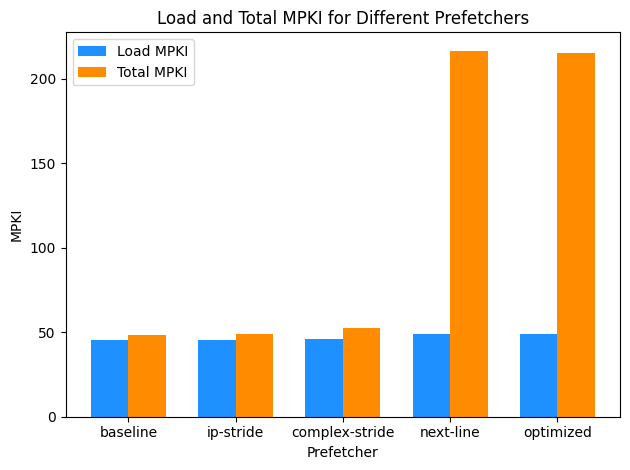

In [16]:
plot_for_trace(1)

<Figure size 600x400 with 0 Axes>

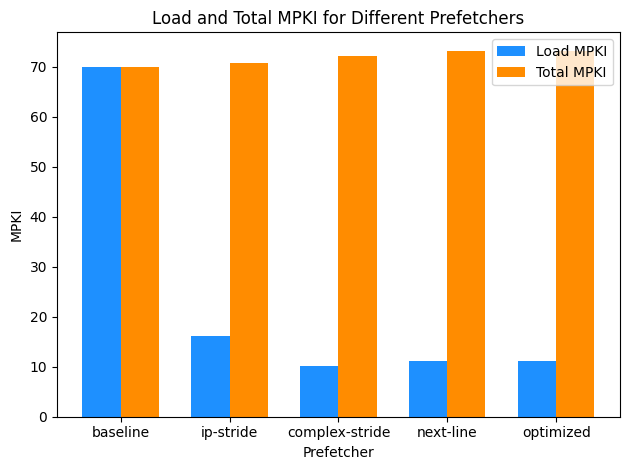

In [17]:
plot_for_trace(2)

<Figure size 600x400 with 0 Axes>

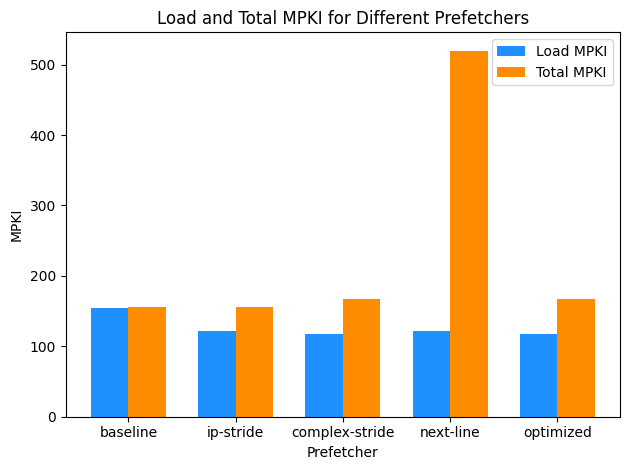

In [18]:
plot_for_trace(3)